# 0. Import packages

In [1]:
import sys
import os

PATH_with_functions = '/home/ardhuin/TOOLS/OPTOOLS/PYTHON/'


PWD_PATH = os.getcwd()
# appending a path
sys.path.append(PATH_with_functions)
#sys.path.append('/home/mdecarlo/Documents/TOOLS/optools_FA/optools/PYTHON/codes_Marine/')


import glob
import xarray as xr
import numpy as np
import pandas as pd


from functions_cfosat_env import get_indices_macrocycles
from Misc_functions import HandlerColumnLines
from altimetry_waveforms_functions import *

# --- plotting and interactive stuff ----------------------
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

import matplotlib.collections as mcol # to plot multilines


cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

PATH_save0='/home/mdecarlo/Documents/PROJETS/TCFO_Tempetes_vs_CFOSAT/WaveGroups/'


# 1. Load data

In [2]:
islocal = 1
nbeam=2

PATH0 = '/home/datawork-cersat-public/provider/cnes/satellite/'
if islocal==1:
    PATH_L2 = '/home/mdecarlo/Documents/DATA/CFOSAT_NADIR/'
    PATH_L1A = '/home/mdecarlo/Documents/DATA/CFOSAT_L1A/'
else:
    PATH_L2 = PATH0+'l2/cfosat/swim/swi_l2____/op05/5.1.2/'
    PATH_L1A = PATH0+'l1a/cfosat/swim/swi_l1a___/op05/5.1.2/'

filel1a = PATH_L1A+'2020/045/CFO_OP05_SWI_L1A____F_20200214T090559_20200214T103900.nc'
file_L2 = PATH_L2+'2020/045/CFO_OP05_SWI_L2_____F_20200214T090559_20200214T103900.nc'

filel1a = '/home/ardhuin/PUBLI/2023_groups/DATA/CFO_OP05_SWI_L1A____F_20200214T090559_20200214T103900.nc'
file_L2 = '/home/ardhuin/PUBLI/2023_groups/DATA/CFO_OP05_SWI_L2_____F_20200214T090559_20200214T103900.nc'

dsl1a = xr.open_dataset(filel1a,decode_times=False)
DS = xr.open_dataset(file_L2,decode_times=False)


In [3]:
dsl1a

<xarray.Dataset>
Dimensions:                           (n_mcycles: 25819, n_swath_0: 256,
                                       n_swath_1: 755, n_swath_2: 933,
                                       n_swath_3: 2771, n_swath_4: 2639,
                                       n_swath_5: 3215, n_beam: 6, n_tim: 2,
                                       n_beam0: 1, n_swath_0_cor: 512)
Dimensions without coordinates: n_mcycles, n_swath_0, n_swath_1, n_swath_2,
                                n_swath_3, n_swath_4, n_swath_5, n_beam, n_tim,
                                n_beam0, n_swath_0_cor
Data variables: (12/80)
    echo_l1a_0                        (n_mcycles, n_swath_0) float32 ...
    echo_l1a_1                        (n_mcycles, n_swath_1) float32 ...
    echo_l1a_2                        (n_mcycles, n_swath_2) float32 ...
    echo_l1a_3                        (n_mcycles, n_swath_3) float32 ...
    echo_l1a_4                        (n_mcycles, n_swath_4) float32 ...
    echo_l1a_5                        (n_mcycles, n_swath_5) float32 ...
    ...                                ...
    reliable_swath_0                  (n_swath_0) float32 ...
    reliable_swath_1                  (n_swath_1) float32 ...
    reliable_swath_2                  (n_swath_2) float32 ...
    reliable_swath_3                  (n_swath_3) float32 ...
    reliable_swath_4                  (n_swath_4) float32 ...
    reliable_swath_5                  (n_swath_5) float32 ...
Attributes: (12/49)
    history:                              none
    institution:                          CNES
    references:                           DDI CFOSAT - Ref. CF_GSFR-ICD-1094-...
    title:                                SWIM_L1A____product
    Conventions:                          CF-1.7
    date_created:                         2020-12-23T15:56:14Z
    ...                                   ...
    nimp:                                 264;97;97;156;186;204
    antenna_rotation_speed:               5.6
    beam_elevation:                       0.000000;2.300000;3.700000;5.550000...
    beam_width:                           1.585000;1.530000;1.740000;1.860000...
    signal_sampling_in_radar_geometry:    0.374741;1.498962;1.498962;0.749481...
    signal_resolution_in_radar_geometry:  0.468426;1.873703;1.873703;0.936851...

# 1. Plots

box index: 9
Noise level? 0.0010177956
size of waveforms array: 1 50 256
Retracking waveforms 0  out of  1  ------------ 
size of waveforms array: 1 50 256
Retracking waveforms 0  out of  1  ------------ 
Retracking result: 9.167457437646538 1.1192781214619145 100.4602663631027
Retracking result: 9.159274345912337 1.1539496874787956 0.8050770938588686
stds  HS(native,ML,LS): 0.48285604 0.4897286674746096 0.6397974664845373
means Hs(native,ML,LS): 9.31558 9.660649806658794 9.130432816836306 100.28788187839304 0.4739913761607585
stds   z(native,ML,LS): None 0.1612049916048471 0.15727856124095857
means  z(native,ML,LS): None 1.2207380388328455 1.1827948017948453
box index: 35
Noise level? 0.0010654292
size of waveforms array: 1 50 256
Retracking waveforms 0  out of  1  ------------ 
size of waveforms array: 1 50 256
Retracking waveforms 0  out of  1  ------------ 
Retracking result: 13.947123351667406 2.0752741723103507 100.3030582184877
Retracking result: 11.648424951436436 2.00033327998

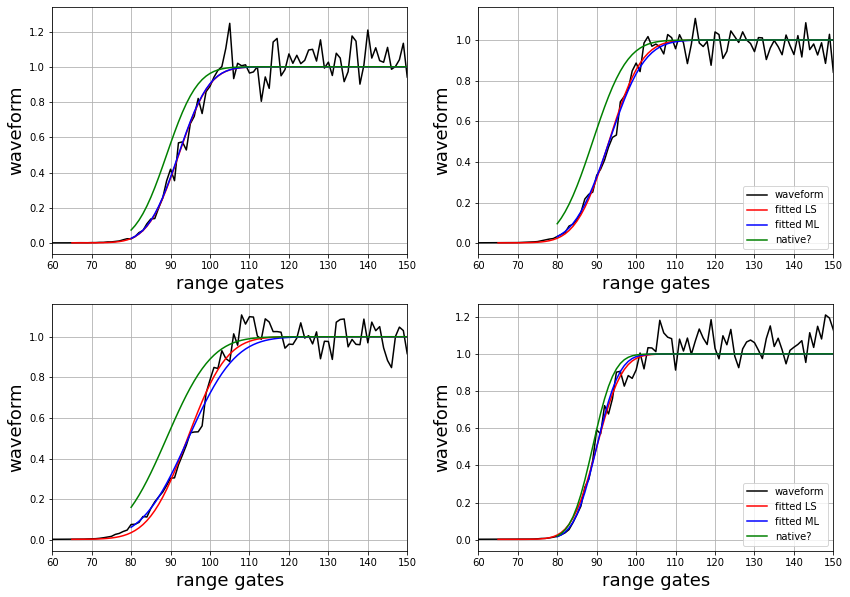

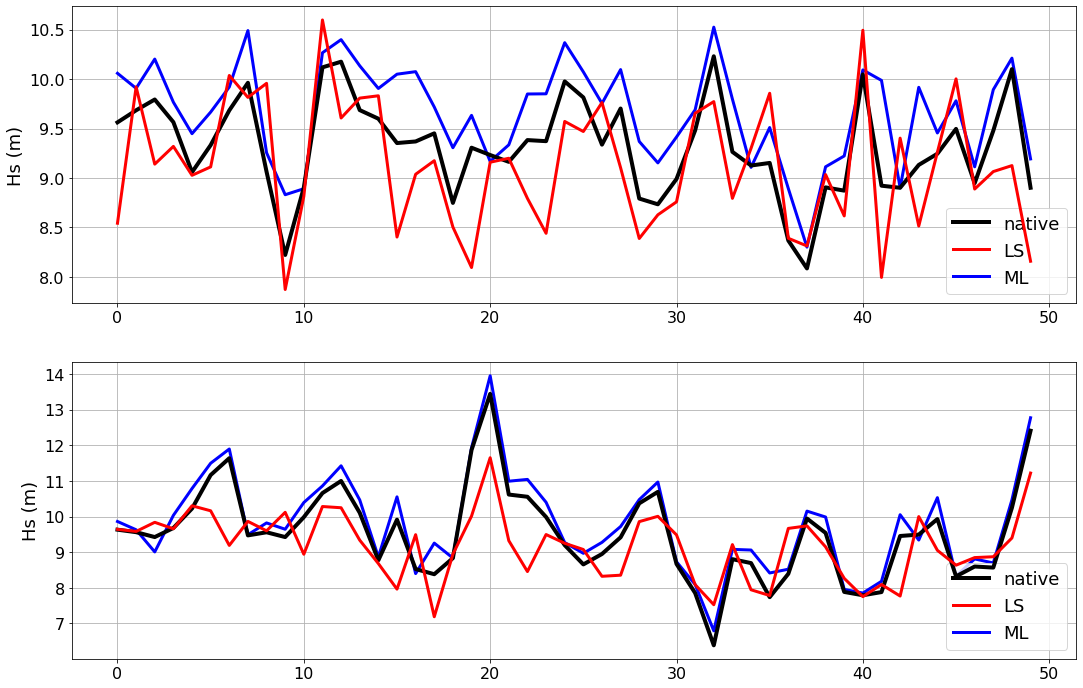

In [4]:
############# Retracking
Altis = np.array([519*1e3, 781*1e3, 800*1e3, 891*1e3, 1340*1e3])
namesAltis = ['CFOSAT', 'SARAL', 'ENVISAT', 'SWOT', 'Jason3']
BW = np.array([(400*1e6),(500*1e6),(320*1e6),(320*1e6),(320*1e6)])
BX = np.array([(320*1e6),(500*1e6),(320*1e6),(320*1e6),(320*1e6)])
theta3dBs=np.array([(1.6),(0.61),(1.28),(1.28),(1.28)])*np.pi/180.
ialti = 0

theta3dB=theta3dBs[ialti]
alti_sat = Altis[ialti]
bandwidth = BW[ialti]
bandx     = BX[ialti]       # bandwidth in Hz (note that CFOSAT/SWIM is oversampled to a 400 MHz band)
nameSat = namesAltis[ialti]
tau=1E9/bandwidth

clight = 299792458
dr = clight * 1/(2*bandwidth)

is_echo_l1a = 1

if is_echo_l1a:
   wf_model='wf_erf2D'
   var = 'echo_l1a_0'
   max_range_fit=180
   min_range_fit=80
   nominal_tracking_gate=89
   minLS=65
else:
   wf_model='wf_brown'
   var = 'echo_l1_0'
   max_range_fit=300
   min_range_fit=205
   nominal_tracking_gate=220
   minLS=200

range_offset = nominal_tracking_gate*dr  # number of meters above nadir sea level included in waveform

    
issave = 1
fig,axs=plt.subplots(2,2,figsize=(14,10))
fig,axt=plt.subplots(2,1,figsize=(18,12))
jbox=np.array([9,35])
#jbox=np.array([9,18])
#jbox=np.array([18,50])  # max and ow wind

ip1=60
ip=20
iq=32
#iq=47

for ibox in range(2):
    kbox=jbox[ibox]
# --- Select indices corresponding to macrocycles of interest ----------------
    inds = get_indices_macrocycles(DS['indices_boxes'].isel(n_box=kbox,n_posneg=1,n_beam_l1a=0))
    print('box index:',kbox)

    ds_l1 = dsl1a.isel(n_mcycles=inds,n_beam=0,n_beam0=0)
    hsat  = ds_l1['altitude']
    Re    = ds_l1['earth_radius']
    nt    = ds_l1['echo_l1_0_nt']
    flag_d= ds_l1['flag_dep_allbeams']
    misp=(ds_l1['alpha_r_p']**2+ds_l1['alpha_t_p']**2)
    Hs_native = DS['nadir_swh_native'].isel(n_mcycles=inds).values
    sig_native = 10**(DS['nadir_sigma0_native'].isel(n_mcycles=inds)/10)

# normalized waveform l1
    wfs = ds_l1[var]/sig_native
    mean_wf = (wfs).mean(dim='n_mcycles',skipna=True)
    std_wf = (wfs).std(dim='n_mcycles')
   
    waveforms=np.expand_dims(wfs, 0)
    misp2    =np.expand_dims(misp, 0)
    [nx,ny,nr]=np.shape(waveforms)
    ranges = np.arange(0,nr*dr,dr)    # remember to increase 35 to higher values if needed
    tax=1E9/bandx
    stonano=1000000000
    rtot=(2./clight)*stonano  #Converts range to time
    times=ranges*rtot
    nr2=int(nr/2)
    t0=tau*(nr2-1)
    PTR=(np.sinc(np.pi*(times-t0)/tax))**2
    s=sum(PTR)
    PTR=PTR/s


    in1=nominal_tracking_gate-40
    in2=nominal_tracking_gate-30
    noise=np.median(np.mean(waveforms[:,:,in1:in2],axis=2))
    print('Noise level?',noise)
    
    wf_model='wf_erf2D'
    Hs1,ze1,Pu1,da1,R01,di1=retrack_waveforms(waveforms,ranges,max_range_fit,clight,tau=tau,\
                                    #min_method='pyramid2',wf_model=wf_model,costfun='ML',\
                                    #min_method='Nelder-Mead',wf_model=wf_model,costfun='LS',\
                                    min_method='Nelder-Mead',PTR_model='True',PTR=PTR,wf_model=wf_model,costfun='ML',\
                                    alti_sat=alti_sat,mispointing=misp2,theta3dB=theta3dB,\
                                    nominal_tracking_gate=nominal_tracking_gate,min_range_fit=min_range_fit)
    Hs2,ze2,Pu2,da2,R02,di2=retrack_waveforms(waveforms,ranges,max_range_fit,clight,tau=tau,\
                                    #min_method='pyramid2',wf_model=wf_model,costfun='LS',\
                                    min_method='Nelder-Mead',PTR_model='True',PTR=PTR,wf_model=wf_model,costfun='LS',\
                                    alti_sat=alti_sat,mispointing=misp2,theta3dB=theta3dB,\
                                    nominal_tracking_gate=nominal_tracking_gate,min_range_fit=minLS)

    print('Retracking result:',Hs1[0,ip],ze1[0,ip],di1[0,ip])
    print('Retracking result:',Hs2[0,ip],ze2[0,ip],di2[0,ip])
    print('stds  HS(native,ML,LS):',np.std(Hs_native),np.std(Hs1),np.std(Hs2))
    print('means Hs(native,ML,LS):',np.mean(Hs_native),np.mean(Hs1),np.mean(Hs2),np.mean(di1),np.mean(di2))
    print('stds   z(native,ML,LS):',None,np.std(ze1),np.std(ze2))
    print('means  z(native,ML,LS):',None,np.mean(ze1),np.mean(ze2))
    
    wf_fit=wf_eval(ranges,np.array((ze1[0,ip],Hs1[0,ip],Pu1[0,ip],da1[0,ip],R01[0,ip])),clight,wf_model,noise=noise,alti_sat=alti_sat,\
                            PTR_model='True',PTR=PTR,tau=tau,nominal_tracking_gate=nominal_tracking_gate,mispointing=misp2[0,ip],theta3dB=theta3dB)
    wf_fit2=wf_eval(ranges,np.array((ze2[0,ip],Hs2[0,ip],Pu2[0,ip],da2[0,ip],R02[0,ip])),clight,wf_model,noise=noise,alti_sat=alti_sat,\
                            PTR_model='True',PTR=PTR,tau=tau,nominal_tracking_gate=nominal_tracking_gate,mispointing=misp2[0,ip],theta3dB=theta3dB)
    wf_fit3=wf_eval(ranges,np.array((0.,Hs_native[ip],Pu2[0,ip],0,0)),clight,wf_model,noise=noise,alti_sat=alti_sat,\
                            PTR_model='True',PTR=PTR,tau=tau,nominal_tracking_gate=nominal_tracking_gate,mispointing=misp2[0,ip],theta3dB=theta3dB)
    
    wf_fit4=wf_eval(ranges,np.array((ze1[0,iq],Hs1[0,iq],Pu1[0,ip],da1[0,iq],R01[0,iq])),clight,wf_model,noise=noise,alti_sat=alti_sat,\
                            PTR_model='True',PTR=PTR,tau=tau,nominal_tracking_gate=nominal_tracking_gate,mispointing=misp2[0,iq],theta3dB=theta3dB)
    wf_fit5=wf_eval(ranges,np.array((ze2[0,iq],Hs2[0,iq],Pu2[0,iq],da2[0,iq],R02[0,iq])),clight,wf_model,noise=noise,alti_sat=alti_sat,\
                            PTR_model='True',PTR=PTR,tau=tau,nominal_tracking_gate=nominal_tracking_gate,mispointing=misp2[0,iq],theta3dB=theta3dB)
    wf_fit6=wf_eval(ranges,np.array((0.,Hs_native[iq],Pu2[0,iq],0,0)),clight,wf_model,noise=noise,alti_sat=alti_sat,\
                            PTR_model='True',PTR=PTR,tau=tau,nominal_tracking_gate=nominal_tracking_gate,mispointing=misp2[0,iq],theta3dB=theta3dB)
    ax=axs[ibox,0]
#    line1=ax.plot(ranges[minLS:max_range_fit],waveforms[0,ip,minLS:max_range_fit],color='k',label='waveform')
#    line3=ax.plot(ranges[minLS:max_range_fit],wf_fit2[minLS:max_range_fit],color='r',label='fitted LS')
#    line2=ax.plot(ranges[min_range_fit:max_range_fit],wf_fit[min_range_fit:max_range_fit],color='b',label='fitted ML')
#    line4=ax.plot(ranges[min_range_fit:max_range_fit],wf_fit3[min_range_fit:max_range_fit],color='g',label='native?')
    line1=ax.plot(range(0,max_range_fit),waveforms[0,ip,0:max_range_fit],color='k',label='waveform')
    line3=ax.plot(range(minLS,max_range_fit),wf_fit2[minLS:max_range_fit],color='r',label='fitted LS')
    line2=ax.plot(range(min_range_fit,max_range_fit),wf_fit[min_range_fit:max_range_fit],color='b',label='fitted ML')
    line4=ax.plot(range(min_range_fit,max_range_fit),wf_fit3[min_range_fit:max_range_fit],color='g',label='native?')
    ax.set_xlim((ip1,150))
    ax.set_xlabel('range gates', fontsize=18)
    ax.set_ylabel('waveform', fontsize=18)
    #ax.set_yscale('log')
    ax=axs[ibox,1]
#    line1=ax.plot(ranges[minLS:max_range_fit],waveforms[0,iq,minLS:max_range_fit],color='k',label='waveform')
#    line3=ax.plot(ranges[minLS:max_range_fit],wf_fit5[minLS:max_range_fit],color='r',label='fitted LS')
#    line2=ax.plot(ranges[min_range_fit:max_range_fit],wf_fit4[min_range_fit:max_range_fit],color='b',label='fitted ML')
#    line4=ax.plot(ranges[min_range_fit:max_range_fit],wf_fit6[min_range_fit:max_range_fit],color='g',label='native?')
    line1=ax.plot(range(0,max_range_fit),waveforms[0,iq,0:max_range_fit],color='k',label='waveform')
    line3=ax.plot(range(minLS,max_range_fit),wf_fit5[minLS:max_range_fit],color='r',label='fitted LS')
    line2=ax.plot(range(min_range_fit,max_range_fit),wf_fit4[min_range_fit:max_range_fit],color='b',label='fitted ML')
    line4=ax.plot(range(min_range_fit,max_range_fit),wf_fit6[min_range_fit:max_range_fit],color='g',label='native?')
    ax.set_xlim((ip1,150))
    ax.set_xlabel('range gates', fontsize=18)
    ax.set_ylabel('waveform', fontsize=18)
    #ax.set_yscale('log')
    leg = ax.legend(loc='lower right')


## ======= Box I ============================================
    ax = axt[ibox]
    line1 = ax.plot(Hs_native,color='k',linestyle='-',lw=4,zorder=20,label='native')
    line3 = ax.plot(Hs2.T,color='r',linestyle='-',lw=3,zorder=25,label='LS')
    line2 = ax.plot(Hs1.T,color='b',linestyle='-',lw=3,label='ML')
    ax.set_ylabel('Hs (m)', fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    leg = ax.legend(loc='lower right', fontsize=18)


issave=0    
if issave:
   ax=axs[0,0]
   print('ax:',ax)
   fig = ax.figure 
   fig.savefig('Fig1_waveforms_L1A_SWIM_9_35_22_30_erf2D.pdf')
   ax=axt[0]
   fig = ax.figure 
   fig.savefig('Fig2_Hs_L1A_SWIM_9_35_22_30_erf2D_PTR.pdf')


corr: 0.8127718479521807
corr: 0.47381307301144776
corr: 0.8376300179486019


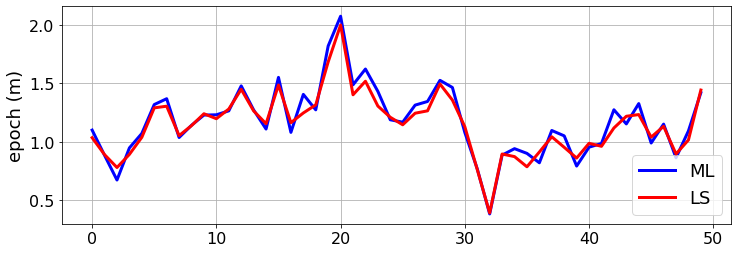

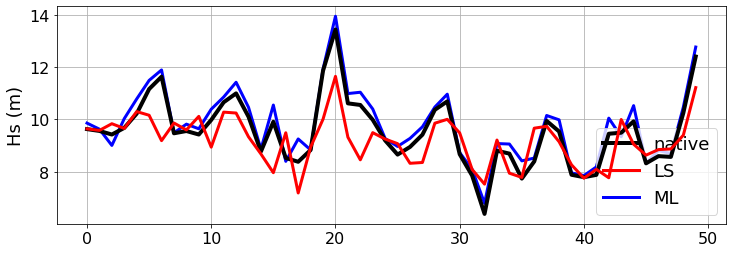

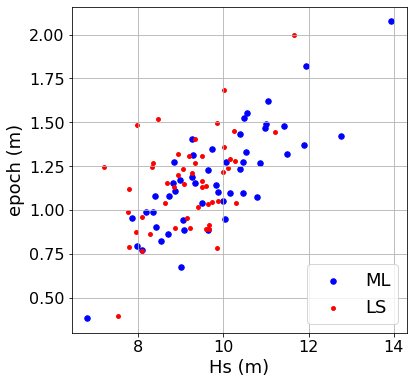

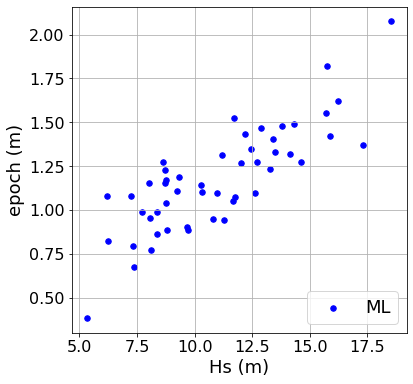

In [5]:
    fig, ax = plt.subplots(figsize=(12,4))
    line2 = ax.plot(ze1.T,color='b',linestyle='-',lw=3,label='ML')
    line3 = ax.plot(ze2.T,color='r',linestyle='-',lw=3,zorder=25,label='LS')
    plt.ylabel('epoch (m)', fontsize=18)
    plt.legend(loc='lower right', fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    #fig.savefig('epochs_erf2D.pdf')

    fig, ax = plt.subplots(figsize=(12,4))
    line1 = ax.plot(Hs_native,color='k',linestyle='-',lw=4,zorder=20,label='native')
    line3 = ax.plot(Hs2.T,color='r',linestyle='-',lw=3,zorder=25,label='LS')
    line2 = ax.plot(Hs1.T,color='b',linestyle='-',lw=3,label='ML')
    ax.set_ylabel('Hs (m)', fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    leg = ax.legend(loc='lower right', fontsize=18)
    #fig.savefig('Hs_erf2D.pdf')


    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(Hs1.T,ze1.T, s=30, c='blue', vmin=0, vmax=100,label='ML')
    ax.scatter(Hs2.T,ze2.T, s=15, c='red', vmin=0, vmax=100,label='LS')
    #ax.scatter(10+Hs1.T-Hs2.T,ze1.T, s=20, c='green', vmin=0, vmax=100,label='ML')
    plt.ylabel('epoch (m)', fontsize=18)
    plt.xlabel('Hs (m)', fontsize=18)
    plt.legend(loc='lower right', fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    #fig.savefig('scatter_erf2D.pdf')

    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(3*Hs1.T-2*Hs2.T,ze1.T, s=30, c='blue', vmin=0, vmax=100,label='ML')
    #ax.scatter(10+Hs1.T-Hs2.T,ze1.T, s=20, c='green', vmin=0, vmax=100,label='ML')
    plt.ylabel('epoch (m)', fontsize=18)
    plt.xlabel('Hs (m)', fontsize=18)
    plt.legend(loc='lower right', fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    print('corr:',np.corrcoef(Hs1,ze1)[0,1])
    print('corr:',np.corrcoef(Hs2,ze2)[0,1])
    print('corr:',np.corrcoef(1.5*Hs1-0.5*Hs2,ze1)[0,1])

